# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" +weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
     
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | mirnyy
Processing Record 5 of Set 1 | duncan town
City not found. Skipping...
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | sabang
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | homer
Processing Record 11 of Set 1 | nyurba
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | enshi
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | wangjing
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | akureyri
Processing Record 22 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,14.20,60,95,2.68,CA,1718240960
1,vila velha,-20.3297,-40.2925,18.97,94,0,1.03,BR,1718241166
2,new norfolk,-42.7826,147.0587,10.51,75,100,1.16,AU,1718241166
3,mirnyy,62.5353,113.9611,23.46,37,30,0.89,RU,1718241167
4,blackmans bay,-43.0167,147.3167,9.85,74,87,0.89,AU,1718241168


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,14.20,60,95,2.68,CA,1718240960
1,vila velha,-20.3297,-40.2925,18.97,94,0,1.03,BR,1718241166
2,new norfolk,-42.7826,147.0587,10.51,75,100,1.16,AU,1718241166
3,mirnyy,62.5353,113.9611,23.46,37,30,0.89,RU,1718241167
4,blackmans bay,-43.0167,147.3167,9.85,74,87,0.89,AU,1718241168


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

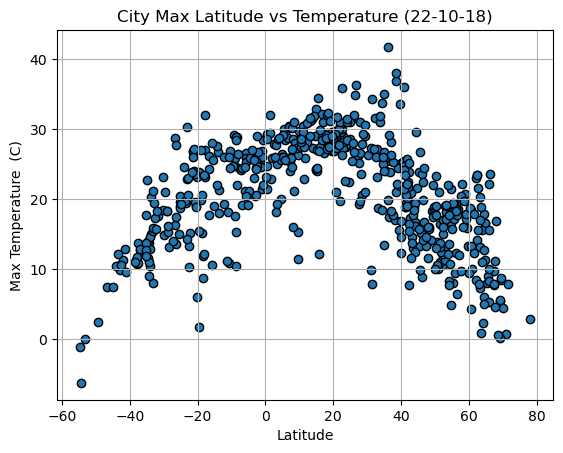

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Max Temp'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

plt.title('City Max Latitude vs Temperature (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature  (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE




#### Latitude Vs. Humidity

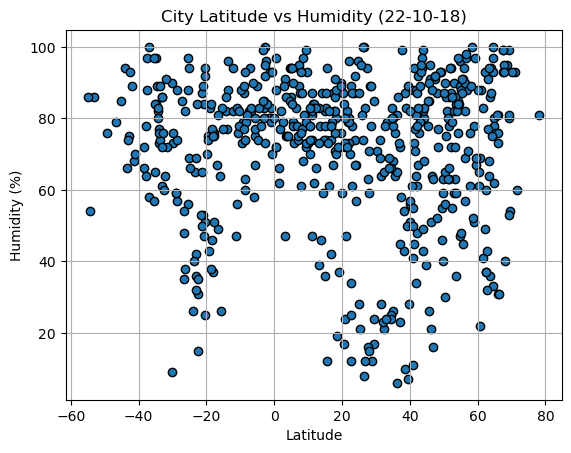

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Humidity'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Humidity (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

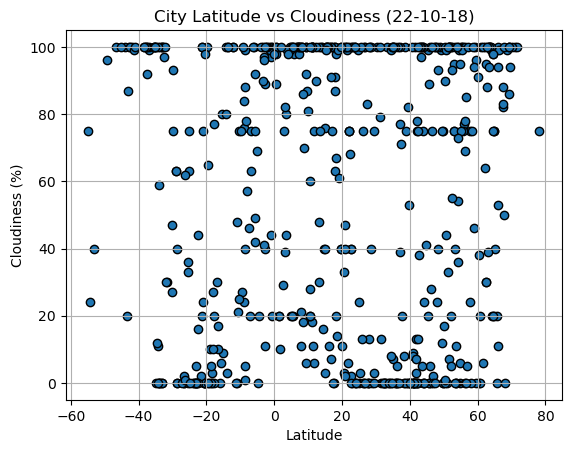

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Cloudiness'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Cloudiness (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

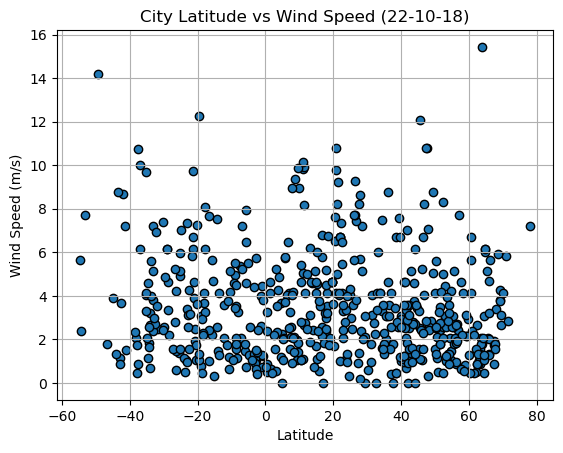

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Wind Speed'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Wind Speed (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, x, y, title, text_coordinates):
    
    # linear regression
    (slope, intercept, rvalue, pvalue, std) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #y = 2x + 28 were 28 is they y-intercept and 2 is the clope of the graph

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    print(f" r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,14.20,60,95,2.68,CA,1718240960
3,mirnyy,62.5353,113.9611,23.46,37,30,0.89,RU,1718241167
5,hawaiian paradise park,19.5933,-154.9731,27.73,72,40,4.63,US,1718241168
6,sabang,5.8933,95.3214,29.41,73,98,5.75,ID,1718241169
8,homer,59.6425,-151.5483,13.21,67,96,2.95,US,1718241170


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vila velha,-20.3297,-40.2925,18.97,94,0,1.03,BR,1718241166
2,new norfolk,-42.7826,147.0587,10.51,75,100,1.16,AU,1718241166
4,blackmans bay,-43.0167,147.3167,9.85,74,87,0.89,AU,1718241168
7,port-aux-francais,-49.3500,70.2167,2.42,76,96,14.19,TF,1718241170
11,coquimbo,-29.9533,-71.3436,14.85,73,75,2.57,CL,1718240961


###  Temperature vs. Latitude Linear Regression Plot

 r-value is: 0.5267205515228747


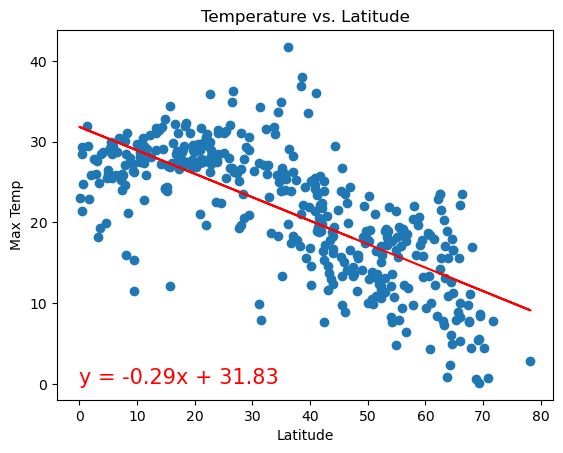

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Max Temp']
plot_linear_regression(x, y, "Latitude", "Max Temp", "Temperature vs. Latitude", (0,0))

 r-value is: 0.4927010665514744


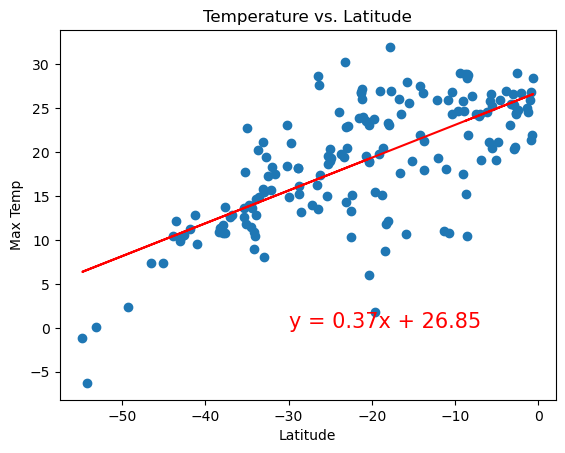

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Max Temp']
plot_linear_regression(x, y, "Latitude", "Max Temp", "Temperature vs. Latitude", (-30,0))

**Discussion about the linear relationship:** There is correlation between the latitude and the temperature however, there is a positive correlation as the latitude increases.

### Humidity vs. Latitude Linear Regression Plot

 r-value is: 0.0007093676157493643


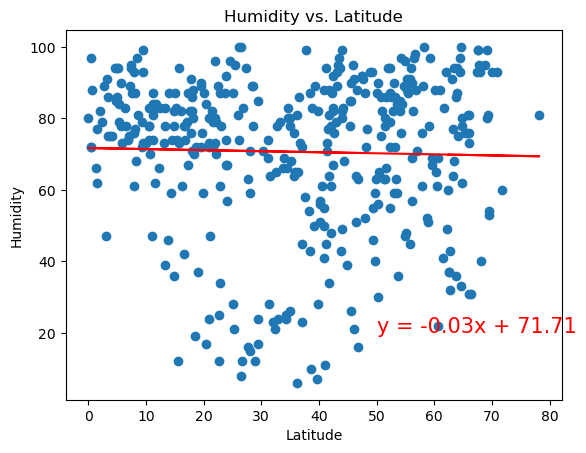

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Humidity']
plot_linear_regression(x, y, "Latitude", "Humidity", "Humidity vs. Latitude", (50,20))

 r-value is: 0.010429263204956891


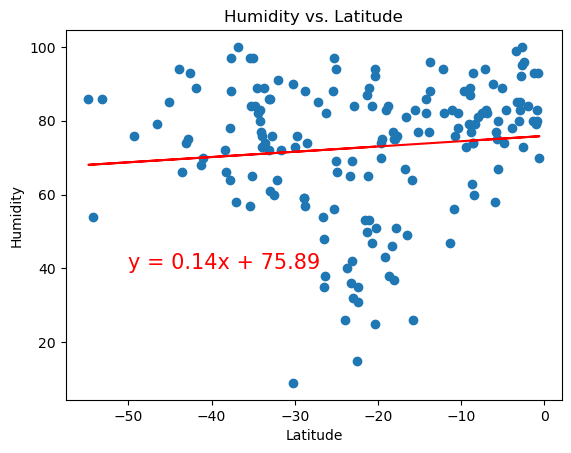

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Humidity']
plot_linear_regression(x, y, "Latitude", "Humidity", "Humidity vs. Latitude", (-50,40))

**Discussion about the linear relationship:** Almost no relationship between the latitude and humidity. The correlation is low as the R-value is 0.01

### Cloudiness vs. Latitude Linear Regression Plot

 r-value is: 0.0016041090881602474


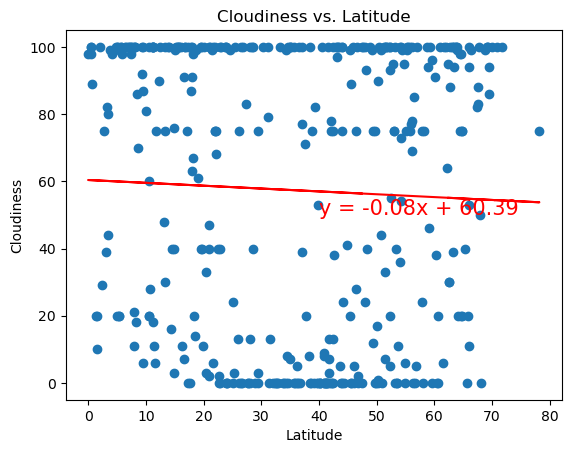

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Cloudiness']
plot_linear_regression(x, y, "Latitude", "Cloudiness", "Cloudiness vs. Latitude", (40,50))

 r-value is: 0.001288505641509587


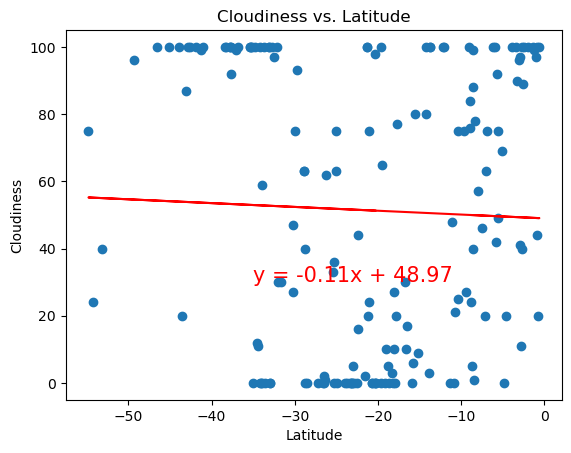

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Cloudiness']
plot_linear_regression(x, y, "Latitude", "Cloudiness", "Cloudiness vs. Latitude", (-35,30))

**Discussion about the linear relationship:** Almost no relationship as the r-value is closer to 0

### Wind Speed vs. Latitude Linear Regression Plot

 r-value is: 0.015533572007231187


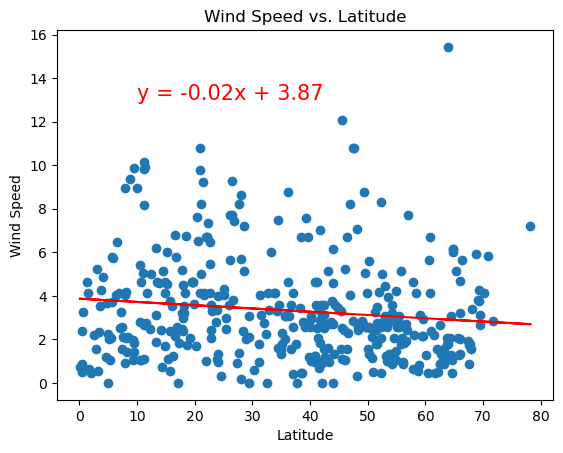

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Wind Speed']
plot_linear_regression(x, y, "Latitude", "Wind Speed", "Wind Speed vs. Latitude", (10,13))

 r-value is: 0.05067598017755071


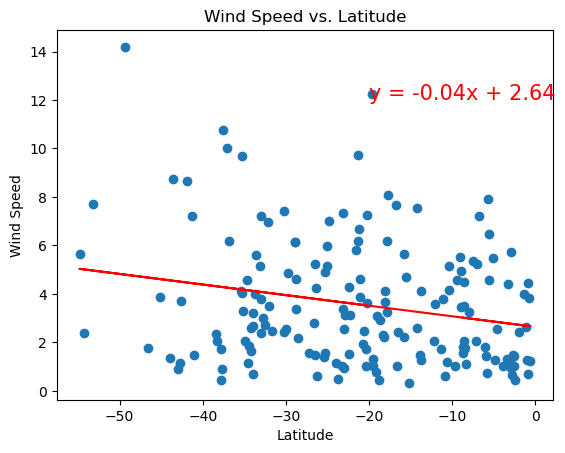

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Wind Speed']
plot_linear_regression(x, y, "Latitude", "Wind Speed", "Wind Speed vs. Latitude", (-20,12))

**Discussion about the linear relationship:** Almost no relationship as the r-value is closer to 0